In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(
    FD_RES, "results", 
    "hic_intact_K562_deep", 
    "coverage_astarrseq_peak_macs_input",
    "region_pair_selected"
)
dir(fdiry)

[1] "region_pair.chr11.tsv.gz" "region_pair.chr12.tsv.gz"
 [3] "region_pair.chr16.tsv.gz" "region_pair.chr19.tsv.gz"
 [5] "region_pair.chr2.tsv.gz"  "region_pair.chr20.tsv.gz"
 [7] "region_pair.chr3.tsv.gz"  "region_pair.chr4.tsv.gz" 
 [9] "region_pair.chr5.tsv.gz"  "region_pair.chr6.tsv.gz" 
[11] "region_pair.chr8.tsv.gz"  "region_pair.chrX.tsv.gz"

In [14]:
fdiry = file.path(
    FD_RES, "results", 
    "hic_intact_K562_deep", 
    "coverage_astarrseq_peak_macs_input",
    "region_pair_selected"
)

cnames = c(
    "Chrom1", "Start1", "End1", 
    "Chrom2", "Start2", "End2",
    "Name"
)
cnames = c(
    cnames,
    "Mean", "SD", 
    "Q1", "Q2", "Q3", 
    "Min", "Max", 
    "Density")

fnames = dir(fdiry)
fpaths = file.path(fdiry, fnames)

lst = lapply(fpaths, function(fpath){
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    return(dat)
})
dat = bind_rows(lst)

dat_region_pair_hic_score = dat
print(dim(dat))
head(dat)

[1] 360722     15


Chrom1,Start1,End1,Chrom2,Start2,End2,Name,Mean,SD,Q1,Q2,Q3,Min,Max,Density
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,32809191,32809816,chr11,32809191,32809816,chr11:32809191-32809816|chr11:32809191-32809816,12.30488,16.81912,2.71161,6.61444,15.69633,1.16805,87.02616,0.70312
chr11,32809191,32809816,chr11,32829398,32830575,chr11:32809191-32809816|chr11:32829398-32830575,0.29146,0.14643,0.19090,0.25886,0.30480,0.16599,0.68057,0.09615
chr11,32809191,32809816,chr11,32838250,32838808,chr11:32809191-32809816|chr11:32838250-32838808,0.34834,0.17667,0.21348,0.21961,0.55264,0.18074,0.57523,0.08929
chr11,32809191,32809816,chr11,32843903,32844319,chr11:32809191-32809816|chr11:32843903-32844319,0.44386,0.41420,0.16852,0.24678,0.42037,0.12858,1.31975,0.22500
chr11,32809191,32809816,chr11,32859295,32859826,chr11:32809191-32809816|chr11:32859295-32859826,0.62384,0.45314,0.20293,0.47448,1.11916,0.13483,1.37269,0.16071
chr11,32809191,32809816,chr11,32870601,32871324,chr11:32809191-32809816|chr11:32870601-32871324,0.31786,0.18109,0.16015,0.24349,0.46334,0.11890,0.61561,0.10938


In [15]:
dat = dat %>%
    tidyr::separate(Name, c("Region1", "Region2"), sep = "\\|") %>%
    dplyr::mutate(
        Chrom = Chrom1,
        Score = Mean) %>%
    dplyr::select(Chrom, Region1, Region2, Score) %>%
    dplyr::mutate(
        Region1 = factor(Region1, levels=rev(unique(Region1))),
        Region2 = factor(Region2, levels=unique(Region1))
    ) %>%
    dplyr::mutate(Proximal = (Region1 == Region2))

dat_score = dat
print(dim(dat))
head(dat)

[1] 360722      5


Chrom,Region1,Region2,Score,Proximal
<chr>,<fct>,<fct>,<dbl>,<lgl>
chr11,chr11:32809191-32809816,chr11:32809191-32809816,12.30488,TRUE
chr11,chr11:32809191-32809816,chr11:32829398-32830575,0.29146,FALSE
chr11,chr11:32809191-32809816,chr11:32838250-32838808,0.34834,FALSE
chr11,chr11:32809191-32809816,chr11:32843903-32844319,0.44386,FALSE
chr11,chr11:32809191-32809816,chr11:32859295-32859826,0.62384,FALSE
chr11,chr11:32809191-32809816,chr11:32870601-32871324,0.31786,FALSE


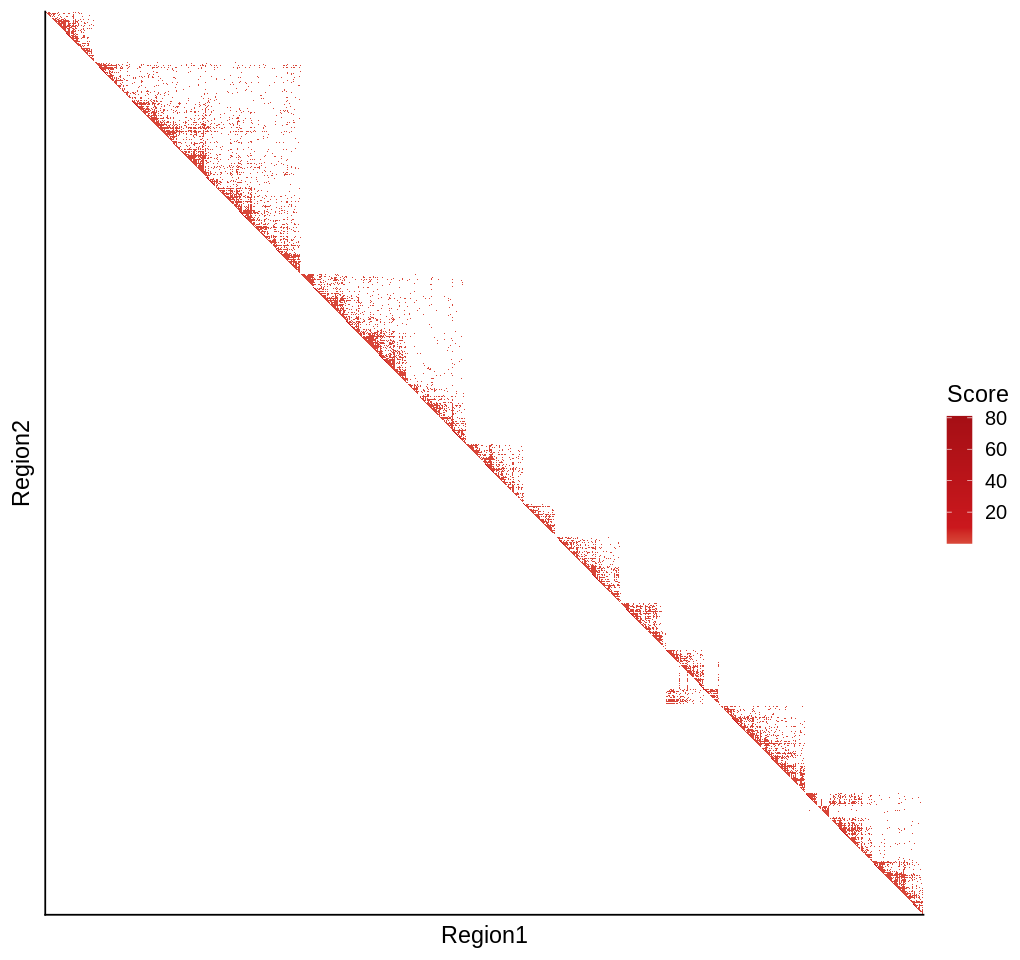

In [16]:
theme_fill = scale_fill_gradient2(
    low  = "white", 
    mid  = "#cb181d", 
    high = "#a50f15",
    midpoint = 10
)
theme_text = theme(
    axis.ticks = element_blank(),
    axis.text  = element_blank())

dat = dat_score
gpt = ggplot(dat, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile() +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=8, repr.plot.width=8.5)
print(gpt)

In [20]:
unique(dat_score$Chrom)

[1] "chr11" "chr12" "chr16" "chr19" "chr2"  "chr20" "chr3"  "chr4"  "chr5" 
[10] "chr6"  "chr8"  "chrX"

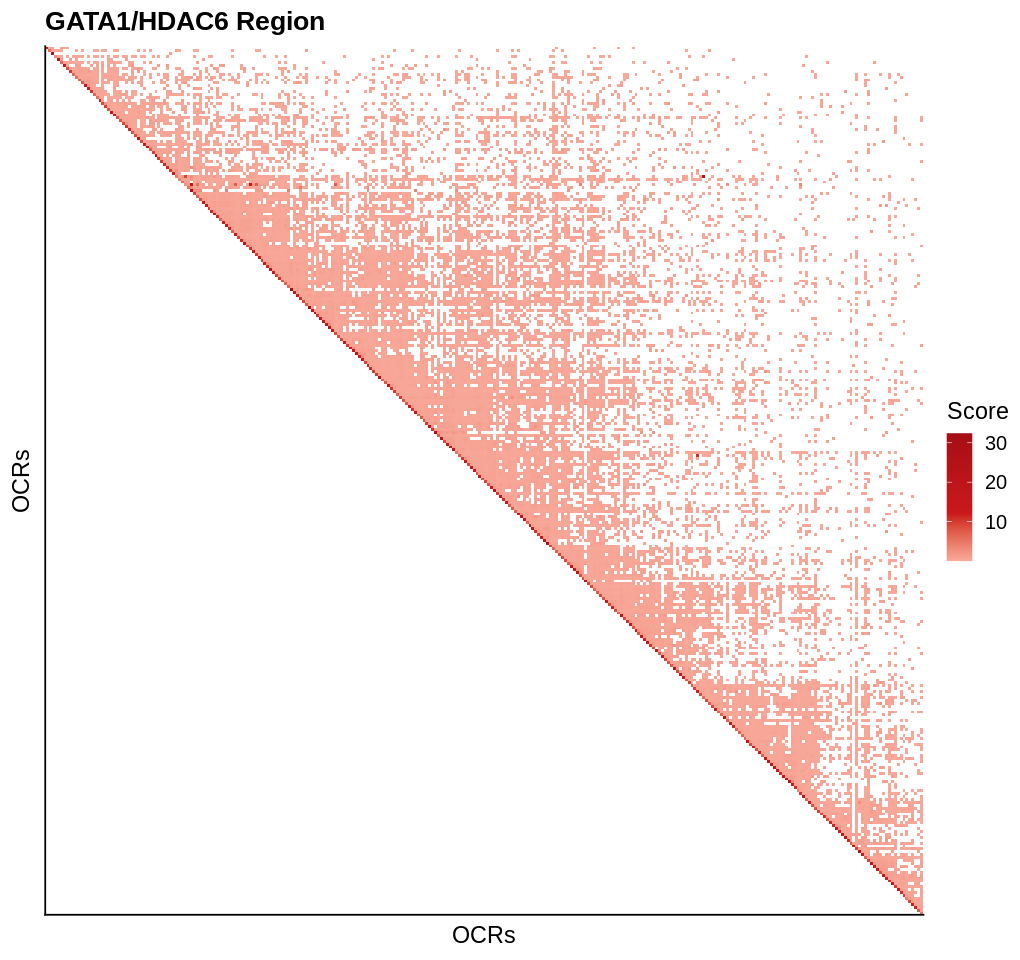

In [40]:
theme_fill = scale_fill_gradient2(
    low  = "white", 
    mid  = "#cb181d", 
    high = "#a50f15",
    midpoint = 12
)
theme_text = theme(
    axis.ticks = element_blank(),
    axis.text  = element_blank())

dat = dat_score %>% dplyr::filter(Chrom == "chrX")
gpt = ggplot(dat, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile() +
    labs(x="OCRs", y="OCRs", title="GATA1/HDAC6 Region") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=8, repr.plot.width=8.5)
print(gpt)